In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('data/train.csv')
target = 'Transported'

In [17]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
drop_cols = ["PassengerId", "Name"]

num_cols = [col for col in num_cols if col not in drop_cols + [target]]
cat_cols = [col for col in cat_cols if col not in drop_cols + [target]]

print(num_cols)
print(cat_cols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']


In [18]:
print("Missing values:")
df.isna().sum()

Missing values:


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [19]:
df[num_cols] = SimpleImputer(strategy="median").fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])

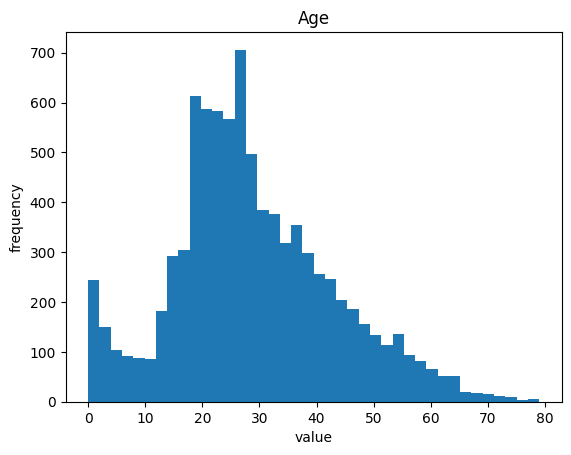

In [20]:
plt.figure()
plt.hist(df["Age"], bins=40)
plt.title("Age")
plt.xlabel("value")
plt.ylabel("frequency")
plt.savefig("images/Age_before_scaling.png", dpi=160, bbox_inches="tight")
plt.show()

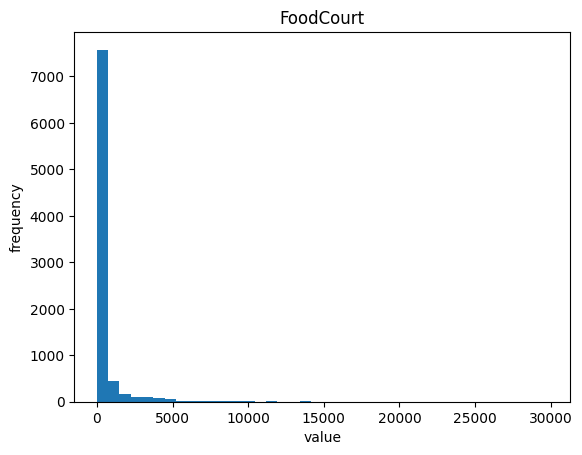

In [21]:
plt.figure()
plt.hist(df["FoodCourt"], bins=40)
plt.title("FoodCourt")
plt.xlabel("value")
plt.ylabel("frequency")
plt.savefig("images/FoodCourt_before_scaling.png", dpi=160, bbox_inches="tight")

In [22]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [23]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
df.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,...,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0001_01,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,Maham Ofracculy,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0002_01,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,Juanna Vines,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0003_01,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,Altark Susent,False,True,...,False,False,False,False,False,False,False,False,True,True
3,0003_02,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,Solam Susent,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,Willy Santantines,True,False,...,False,False,False,False,False,False,False,False,True,False


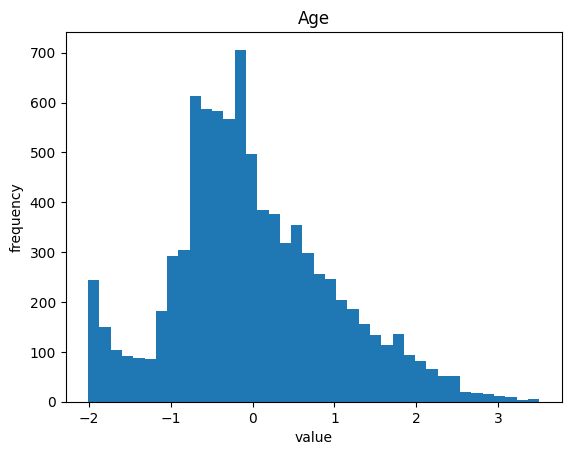

In [25]:
plt.figure()
plt.hist(df["Age"], bins=40)
plt.title("Age")
plt.xlabel("value")
plt.ylabel("frequency")
plt.savefig("images/Age_after_scaling.png", dpi=160, bbox_inches="tight")
plt.show()

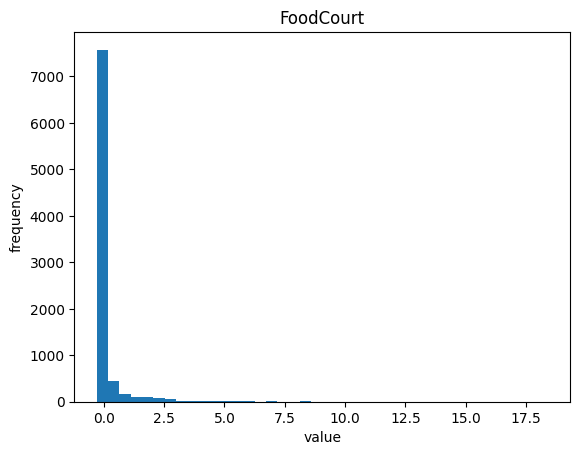

In [26]:
plt.figure()
plt.hist(df["FoodCourt"], bins=40)
plt.title("FoodCourt")
plt.xlabel("value")
plt.ylabel("frequency")
plt.savefig("images/FoodCourt_after_scaling.png", dpi=160, bbox_inches="tight")
plt.show()
